In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image

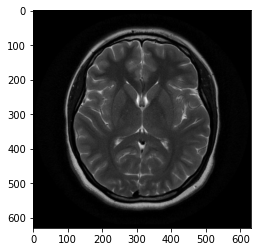

In [2]:
datadir = r"D:\Python projects\Machine Learning\Machine_learning Project 1\brain_tumor_dataset"
CATEGORIES = ["not_tumor","yes_tumor"] #0 , 1


for category in CATEGORIES:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
print(img_array.shape)

(630, 630)


<function matplotlib.pyplot.show(close=None, block=None)>

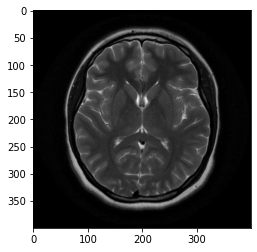

In [4]:
IMG_SIZE = 400

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(datadir, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()        

In [6]:
print(len(training_data))

253


In [7]:
import random

random.shuffle(training_data)

In [8]:
training_data[0]

[array([[6, 6, 6, ..., 6, 5, 5],
        [6, 6, 6, ..., 6, 5, 5],
        [6, 6, 6, ..., 6, 5, 5],
        ...,
        [6, 6, 6, ..., 6, 5, 5],
        [5, 5, 5, ..., 6, 5, 5],
        [5, 5, 5, ..., 6, 5, 5]], dtype=uint8),
 0]

In [9]:
X = []
y = []

In [10]:
import numpy as np
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [11]:
y[:5]

array([0, 1, 1, 1, 1])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [14]:
X_train.shape

(202, 400, 400, 1)

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten

In [20]:
cnn = models.Sequential([
   
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=(400,400,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(50, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [21]:
cnn.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics =['accuracy'])

In [22]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 398, 398, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 199, 199, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 197, 197, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)      

In [23]:
cnn.fit(X_train,y_train, epochs=20)

Epoch 1/20
7/7 [==============================] - 10s 1s/step - loss: 35.6306 - accuracy: 0.5743
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 1.1122 - accuracy: 0.7871
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.4588 - accuracy: 0.8762
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.1604 - accuracy: 0.9505
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.0736 - accuracy: 0.9901
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.0306 - accuracy: 0.9901
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.0105 - accuracy: 1.0000
Epoch 8/20
7/7 [==============================] - 9s 1s/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9/20
7/7 [==============================] - 9s 1s/step - loss: 9.6923e-04 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 9s 1s/step - loss: 3.7543e-04 - accuracy: 1.0000
Epoch 11/20
7/7 [======================

In [24]:
cnn.evaluate(X_test,y_test)

2/2 [==============================] - 1s 243ms/step - loss: 1.3768 - accuracy: 0.8627


[1.3767882585525513, 0.8627451062202454]

In [25]:
y_predicted = cnn.predict(X_test)
y_predicted[:5]

array([[9.9999893e-01],
       [5.1313639e-04],
       [9.9999928e-01],
       [1.0193884e-03],
       [3.1758726e-01]], dtype=float32)

In [26]:
predicted = []
for i in y_predicted:
    if i>0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [27]:
predicted[:5]

[1, 0, 1, 0, 0]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted)

In [29]:
import seaborn as sn

Text(51.0, 0.5, 'Truth')

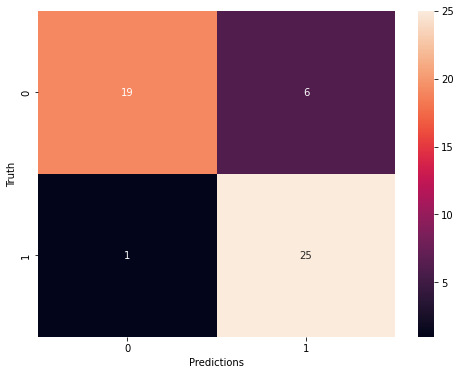

In [30]:
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")